In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
%cd drive/My\ Drive

/content/drive/My Drive


In [0]:
#%cd 10nov

/content/drive/My Drive/10nov


In [0]:
#!unzip 'train.zip'

In [0]:
#!unzip 'valid.zip'

In [0]:
#!unzip 'test.zip'

In [0]:
!pip3 install torch===1.2.0 torchvision===0.4.0 -f https://download.pytorch.org/whl/torch_stable.html
!pip install typeguard

In [0]:
#Imports
from fastai import *
from fastai.vision import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy as sp
from functools import partial
from sklearn import metrics
from collections import Counter
from fastai.callbacks import *
import PIL
import cv2
import sklearn
import skimage
bs = 64

In [0]:
#%cd ..

/content/drive/My Drive


In [0]:
#images_path
path_images = Path('10nov')

In [0]:
#data path and init
data = ImageDataBunch.from_folder(path=path_images, train='train', valid='valid', bs=bs, classes=['TT','others','garbage']) 
data.normalize()

ImageDataBunch;

Train: LabelList (26600 items)
x: ImageList
Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248)
y: CategoryList
TT,TT,TT,TT,TT
Path: 10nov;

Valid: LabelList (7800 items)
x: ImageList
Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248)
y: CategoryList
garbage,garbage,garbage,garbage,garbage
Path: 10nov;

Test: None

In [0]:
data.classes

['TT', 'others', 'garbage']

In [0]:
learn = cnn_learner(data, models.resnet152, metrics=error_rate)
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.79E-05
Min loss divided by 10: 4.90E-03


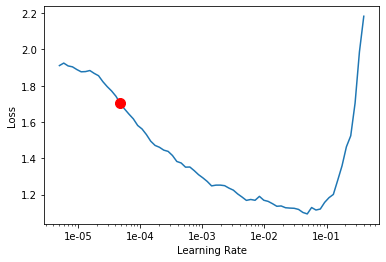

In [0]:
learn.lr_find(start_lr=1e-6, end_lr=1e1, wd=5e-3)
learn.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,error_rate,time
0,0.464227,0.319564,0.107436,2:19:54
1,0.319967,0.257724,0.091538,05:34
2,0.268347,0.203023,0.076410,05:33
3,0.214728,0.197777,0.071667,05:32
4,0.179564,0.187036,0.072051,05:32
5,0.119629,0.201094,0.071026,05:32


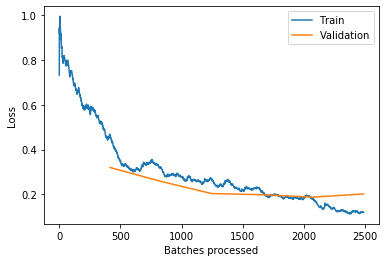

In [0]:
learn.fit_one_cycle(6, max_lr=slice(5e-5, 1e-3))
#learn.save('-stage1')
learn.recorder.plot_losses()

In [0]:
 learn.save('bcell-TL2')

In [0]:
learn.export('bcell-TL2.pkl')

In [0]:
#images_path
path_images = Path('14nov')

In [0]:
#data path and init
data = ImageDataBunch.from_folder(path=path_images, train='train', valid='valid', bs=bs, classes=['TT','others','garbage']) 
data.normalize()

ImageDataBunch;

Train: LabelList (9796 items)
x: ImageList
Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248)
y: CategoryList
garbage,garbage,garbage,garbage,garbage
Path: 14nov;

Valid: LabelList (3114 items)
x: ImageList
Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248)
y: CategoryList
garbage,garbage,garbage,garbage,garbage
Path: 14nov;

Test: None

In [0]:
learn = cnn_learner(data, models.resnet152, metrics=error_rate)

In [0]:
learn.load('/content/drive/My Drive/10nov/models/bcell-TL2')
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.47E-05
Min loss divided by 10: 2.19E-03


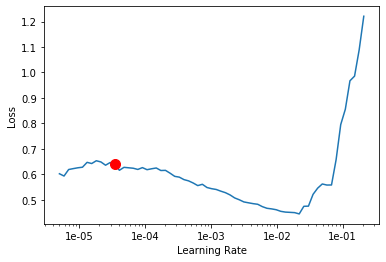

In [0]:
learn.lr_find(start_lr=1e-6, end_lr=1e1, wd=5e-3)
learn.recorder.plot(suggestion=True)

In [0]:
learn.fit_one_cycle(1, max_lr=slice(1e-4, 1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.273672,0.216051,0.081246,37:54


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-06
Min loss divided by 10: 4.79E-05


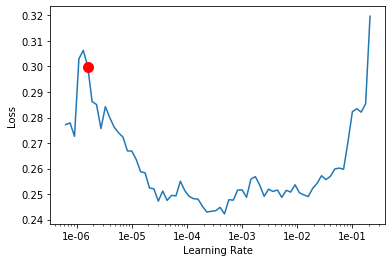

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
learn.fit_one_cycle(1, max_lr=slice(1.6e-6))

epoch,train_loss,valid_loss,error_rate,time
0,0.240777,0.212002,0.078356,01:28


epoch,train_loss,valid_loss,error_rate,time
0,0.238759,0.214794,0.081567,01:28
1,0.236883,0.203534,0.076750,01:28
2,0.245280,0.204128,0.078356,01:28
3,0.241698,0.203407,0.076429,01:28
4,0.237491,0.202413,0.078035,01:28


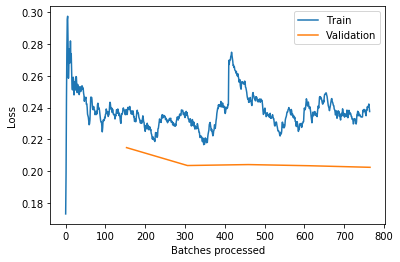

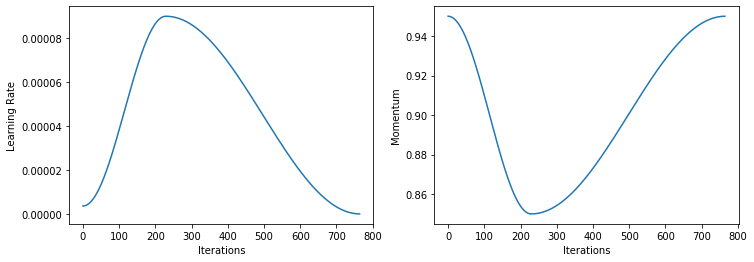

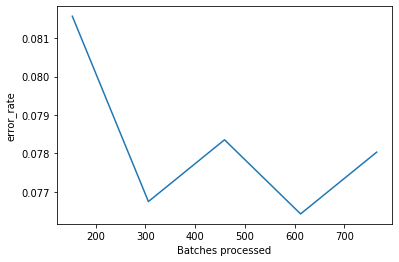

In [0]:
learn.fit_one_cycle(5, max_lr=slice(1.6e-6, 9e-5))
#learn.save('bcells-r152-ndata')
learn.recorder.plot_losses()
# # schedule of the lr (left) and momentum (right) that the 1cycle policy uses
learn.recorder.plot_lr(show_moms=True)
learn.recorder.plot_metrics()

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-06
Min loss divided by 10: 1.32E-05


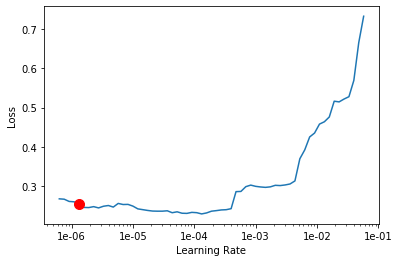

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
learn.fit_one_cycle(1, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.233514,0.196886,0.075145,02:06


epoch,train_loss,valid_loss,error_rate,time
0,0.218929,0.190529,0.074502,02:06
1,0.209023,0.184777,0.070328,02:06
2,0.206041,0.177959,0.067759,02:06
3,0.194227,0.173317,0.061978,02:06
4,0.160315,0.200176,0.056840,02:06
5,0.128382,0.164188,0.055877,02:06
6,0.131885,0.167105,0.054913,02:06
7,0.120069,0.163228,0.053629,02:06


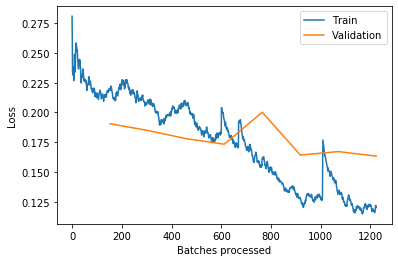

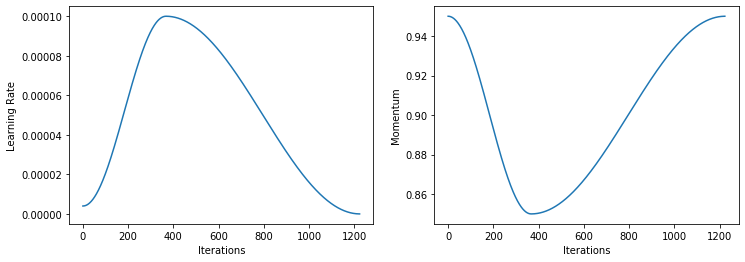

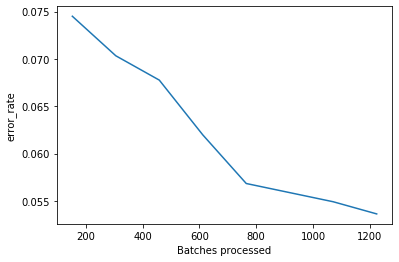

In [0]:
learn.fit_one_cycle(8, max_lr=slice(1e-6, 1e-4))
#learn.save('bcells-r152-ndata')
learn.recorder.plot_losses()
# # schedule of the lr (left) and momentum (right) that the 1cycle policy uses
learn.recorder.plot_lr(show_moms=True)
learn.recorder.plot_metrics()

In [0]:
learn.save('bcell-TL3')

In [0]:
learn.export('bcell-TL3.pkl')

In [0]:
learn.load('bcell-TL3')
interp = ClassificationInterpretation.from_learner(learn)

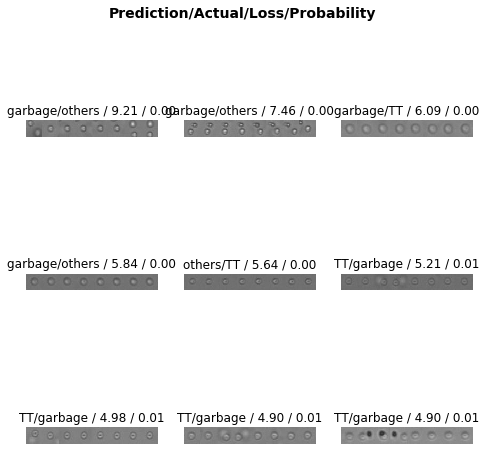

In [0]:
interp.plot_top_losses(9, figsize=(8,8))

In [0]:
losses, indexes = interp.top_losses(20)

top_loss_paths = data.valid_ds.x.items[indexes]

print(top_loss_paths)

[PosixPath('14nov/valid/others/BG1008_10s01_175.jpg') PosixPath('14nov/valid/others/BG1017_10s01_145.jpg')
 PosixPath('14nov/valid/TT/BK1017_10s01_46.jpg') PosixPath('14nov/valid/others/BG1003_10s04_134.jpg')
 PosixPath('14nov/valid/TT/BG1008_10s02_57.jpg') PosixPath('14nov/valid/garbage/BG1022_10s01_1125.jpg')
 PosixPath('14nov/valid/garbage/BG1008_10s03_759.jpg') PosixPath('14nov/valid/garbage/BG1017_10s01_814.jpg')
 PosixPath('14nov/valid/garbage/LJ0926_10s02_1341.jpg') PosixPath('14nov/valid/garbage/BG1008_10s01_932.jpg')
 PosixPath('14nov/valid/garbage/BG1022_10s01_1516.jpg') PosixPath('14nov/valid/garbage/BG1003_10s03_586.jpg')
 PosixPath('14nov/valid/garbage/BG1017_10s03_6248.jpg') PosixPath('14nov/valid/TT/BK1017_10s02_162.jpg')
 PosixPath('14nov/valid/garbage/BG1022_10s01_1315.jpg') PosixPath('14nov/valid/garbage/LJ0926_10s04_3586.jpg')
 PosixPath('14nov/valid/garbage/BG1003_10s03_2172.jpg') PosixPath('14nov/valid/garbage/BK0926_10s02_9233.jpg')
 PosixPath('14nov/valid/garbage

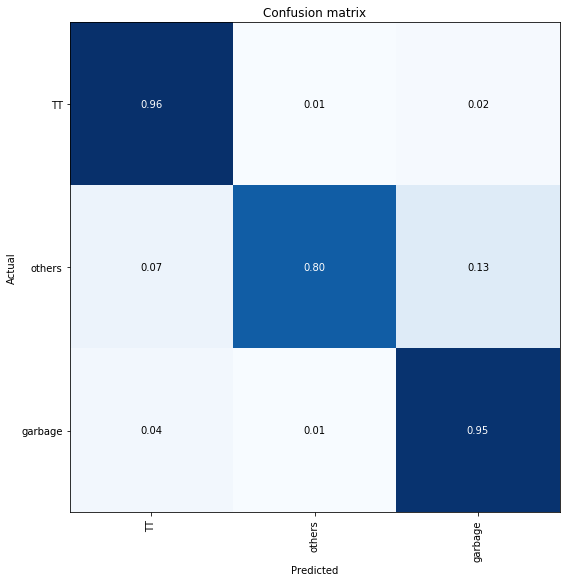

In [0]:
interp.plot_confusion_matrix(normalize=True, figsize=(8,8))

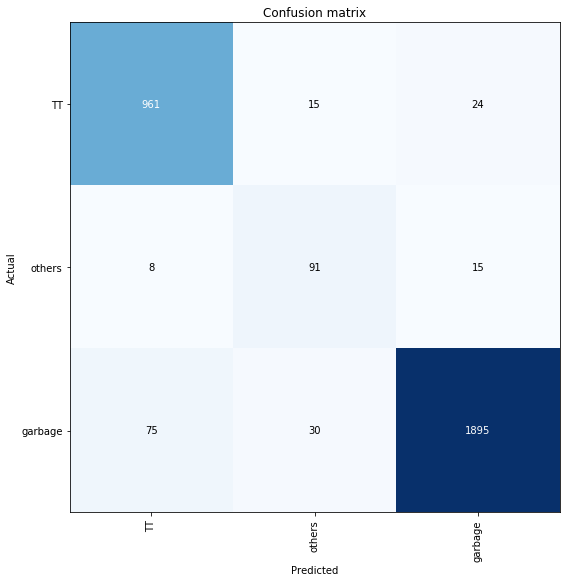

In [0]:
interp.plot_confusion_matrix(figsize=(8,8))

In [0]:
import glob

image_list = glob.glob('14nov/valid/*/*')

C0 = 0
Pred_C0=0
C1=0
Pred_C1=0
C2=0
Pred_C2=0

for each in image_list:
    img = open_image(each)
    each = each.split('/')
    bc_class = each[2]
    pred_class, pred_idx, outputs = learn.predict(img)
    pred_class = str(pred_class)
         
    if bc_class == 'TT':
        C0 += 1
        if pred_class == 'TT':
            Pred_C0 += 1
    elif bc_class == 'others':
        C1 += 1
        if pred_class == 'others':
            Pred_C1 += 1
    elif bc_class == 'garbage':
        C2 += 1
        if pred_class == 'garbage':
            Pred_C2 += 1
            
    
print('TT classification: ' + str(Pred_C0) + '/' + str(C0))
print('others classification: ' + str(Pred_C1) + '/' + str(C1))
print('garbage classification: ' + str(Pred_C2) + '/' + str(C2) )

TT classification: 961/1000
others classification: 91/114
garbage classification: 1895/2000


In [0]:
# Validation score: 94.63%

In [0]:
##############Testing################### (not done)

In [0]:
# path_images = Path('cnrs')
data = ImageDataBunch.from_folder(path=path_images, train='train', valid='test', bs=bs, classes=['TT','others','garbage']) 
data.normalize()

ImageDataBunch;

Train: LabelList (26600 items)
x: ImageList
Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248)
y: CategoryList
TT,TT,TT,TT,TT
Path: 10nov;

Valid: LabelList (8096 items)
x: ImageList
Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248),Image (3, 31, 248)
y: CategoryList
garbage,garbage,garbage,garbage,garbage
Path: 10nov;

Test: None

In [0]:
learn = cnn_learner(data, models.resnet152, metrics=error_rate)

In [0]:
learn = learn.load('bcells-r152')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

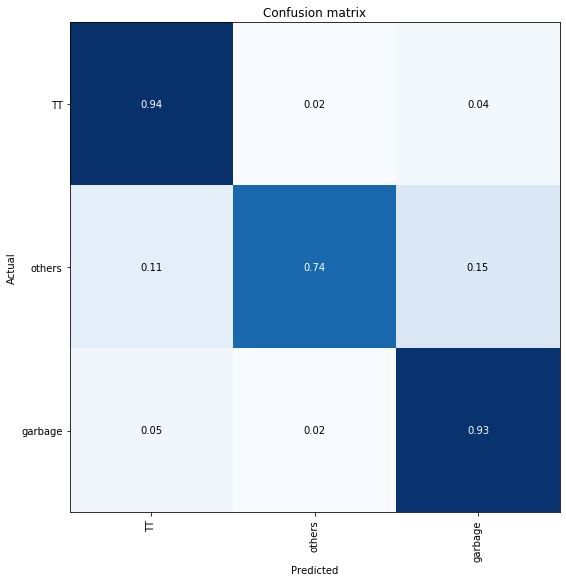

In [0]:
interp.plot_confusion_matrix(normalize=True, figsize=(8,8))

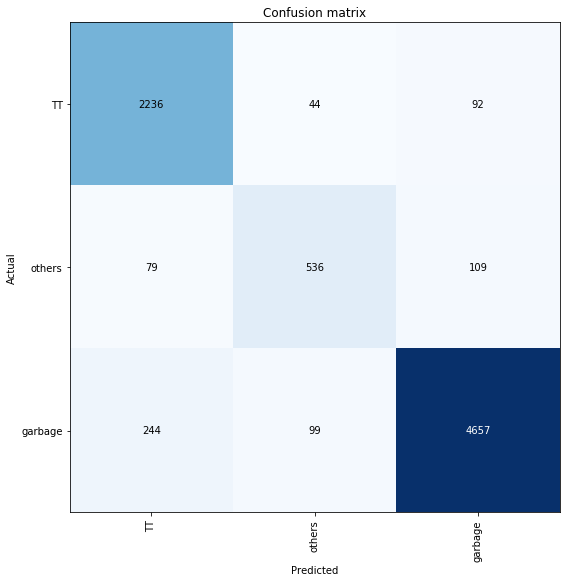

In [0]:
interp.plot_confusion_matrix(figsize=(8,8))

In [0]:
import glob

image_list = glob.glob('10nov/test/*/*')

C0 = 0
Pred_C0=0
C1=0
Pred_C1=0
C2=0
Pred_C2=0

for each in image_list:
    img = open_image(each)
    each = each.split('/')
    bc_class = each[2]
    pred_class, pred_idx, outputs = learn.predict(img)
    pred_class = str(pred_class)
         
    if bc_class == 'TT':
        C0 += 1
        if pred_class == 'TT':
            Pred_C0 += 1
    elif bc_class == 'others':
        C1 += 1
        if pred_class == 'others':
            Pred_C1 += 1
    elif bc_class == 'garbage':
        C2 += 1
        if pred_class == 'garbage':
            Pred_C2 += 1
            
    
print('TT classification: ' + str(Pred_C0) + '/' + str(C0))
print('others classification: ' + str(Pred_C1) + '/' + str(C1))
print('garbage classification: ' + str(Pred_C2) + '/' + str(C2) )

TT classification: 2236/2372
others classification: 536/724
garbage classification: 4657/5000
